In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

import pandas as pd
import numpy as np

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Employee.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [2]:
dataset.shape

(4653, 9)

In [3]:
dataset.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
dataset.duplicated().sum()

1889

In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
dataset.shape

(2764, 9)

In [7]:
dataset['LeaveOrNot'].value_counts(ascending=True)

1    1088
0    1676
Name: LeaveOrNot, dtype: int64

In [8]:
#change object columns into binary data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder
dataset['Education'] = label_encoder().fit_transform(dataset['Education'])
dataset['City'] = label_encoder().fit_transform(dataset['City'])
dataset['Gender'] = label_encoder().fit_transform(dataset['Gender'])
dataset['EverBenched'] = label_encoder().fit_transform(dataset['EverBenched'])

<AxesSubplot:>

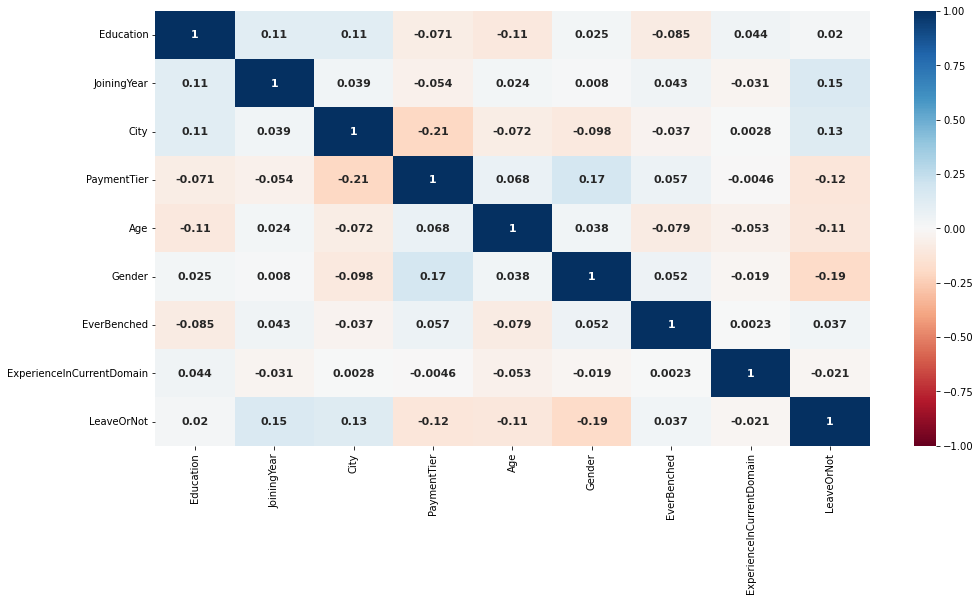

In [9]:
#view correlation between features
import seaborn as sns
plt.figure(figsize = (16,8))
sns.heatmap(dataset.corr(method='pearson'), cmap='RdBu', vmin=-1, vmax=1, annot=True,annot_kws={'fontsize':11, 'fontweight':'bold'})

In [10]:
dataset.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


In [11]:
X = dataset.drop(['LeaveOrNot'], axis=1)
y = dataset['LeaveOrNot']

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7)

In [13]:
RFC_base_model = RandomForestClassifier()
RFC_base_model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
RFC_base_model_train_score = RFC_base_model.score(X_train,y_train)
RFC_base_model_test_score = RFC_base_model.score(X_test,y_test)

In [15]:
print('Training Score: {:.3f}'.format(RFC_base_model_train_score))
print('Testing Score: {:.3f}'.format(RFC_base_model_test_score))

Training Score: 0.938
Testing Score: 0.720


In [16]:
RFC_prediction_1 = RFC_base_model.predict(X_test)
RFC_base_cfm = confusion_matrix(y_test,RFC_prediction_1)


In [17]:
RFC_base_cr = classification_report(y_test,RFC_prediction_1)

In [18]:
KNC_base_model = KNeighborsClassifier()
KNC_base_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
KNC_base_model_train_score = KNC_base_model.score(X_train,y_train)
KNC_base_model_test_score = KNC_base_model.score(X_test,y_test)

In [20]:
print('Training Score: {:.3f}'.format(KNC_base_model_train_score))
print('Testing Score: {:.3f}'.format(KNC_base_model_test_score))

Training Score: 0.807
Testing Score: 0.676


In [21]:
KNC_prediction_1 = KNC_base_model.predict(X_test)
KNC_base_cfm = confusion_matrix(y_test,KNC_prediction_1)

In [22]:
KNC_base_cr = classification_report(y_test,KNC_prediction_1)

In [23]:
LR_base_model = LogisticRegression()
LR_base_model.fit(X_train, y_train)

/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
LR_base_model_train_score = LR_base_model.score(X_train,y_train)
LR_base_model_test_score = LR_base_model.score(X_test,y_test)

In [25]:
print('Training Score: {:.3f}'.format(LR_base_model_train_score))
print('Testing Score: {:.3f}'.format(LR_base_model_test_score))

Training Score: 0.661
Testing Score: 0.646


In [26]:
LR_prediction_1 = LR_base_model.predict(X_test)
LR_base_cfm = confusion_matrix(y_test,LR_prediction_1)

In [27]:
LR_base_cr = classification_report(y_test,LR_prediction_1)

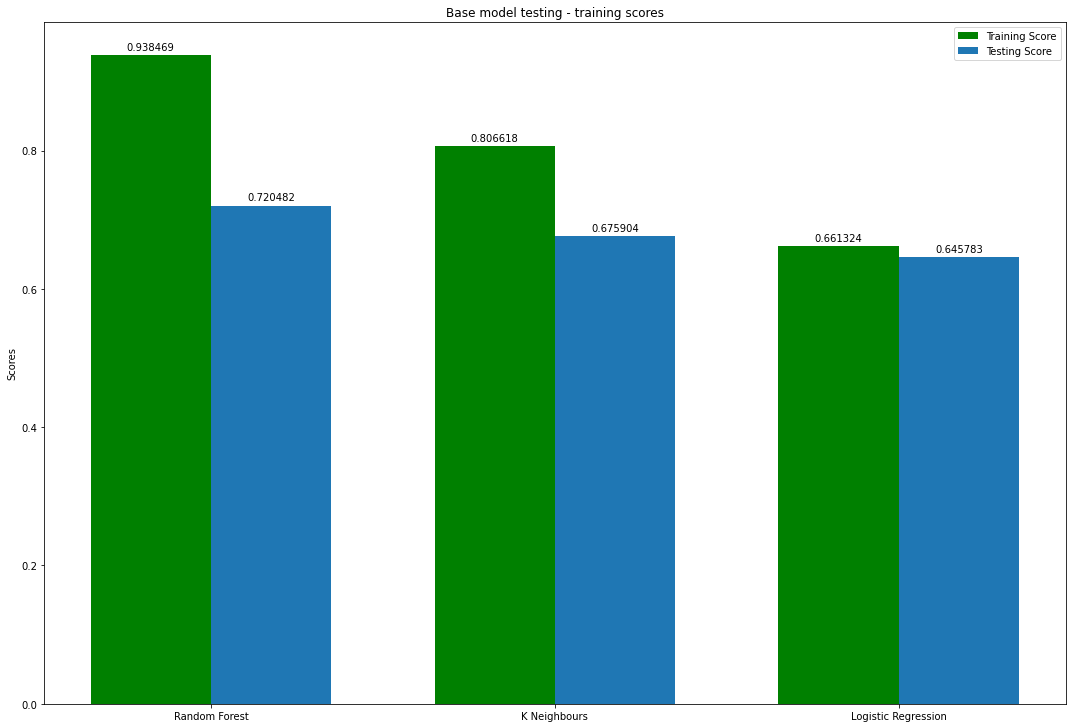

In [28]:
labels = ['Random Forest', 'K Neighbours', 'Logistic Regression']
training_scores = [RFC_base_model_train_score,KNC_base_model_train_score,LR_base_model_train_score]
test_scores =     [RFC_base_model_test_score,KNC_base_model_test_score,LR_base_model_test_score]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Score', color='green')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Score')

ax.set_ylabel('Scores')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.title('Base model testing - training scores')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [30]:
#n_estimatiors = number of trees in forest
#max_features = max number of features to include in single tree
#max_depth = depth of each tree  - more depth means more information is captured (too much could cause overfittingx)
param_grid_rf = { 
    'n_estimators': [25,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10,11,12,13],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5]
}

In [31]:
CV_rfc = GridSearchCV(estimator=RFC_base_model, param_grid=param_grid_rf, cv= 10, scoring='accuracy', n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100]},
             scoring='accuracy')

In [32]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [33]:
y_predict= CV_rfc.predict(X_test)

In [34]:
RFC_2_cfm = confusion_matrix(y_test,y_predict)

In [35]:
RFC_2_cr = classification_report(y_test,y_predict)

In [36]:
RFC_tuned_model_1_train_score = CV_rfc.score(X_train,y_train)
RFC_tuned_model_1_test_score = CV_rfc.score(X_test,y_test)

In [37]:
print('Training Score {:.3f}'.format(RFC_tuned_model_1_train_score))
print('Testing Score {:.3f}'.format(RFC_tuned_model_1_test_score))

Training Score 0.831
Testing Score 0.801


In [38]:
param_grid_kn = { 
    'n_neighbors': [9,10,11,12,13,14],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1,2,3,4,5],
    'p': [1,2]
}

In [39]:
CV_knc = GridSearchCV(estimator=KNC_base_model, param_grid=param_grid_kn, cv= 10, scoring='accuracy', n_jobs=-1)
CV_knc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [9, 10, 11, 12, 13, 14], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
CV_knc.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 4,
 'metric': 'manhattan',
 'n_neighbors': 13,
 'p': 1,
 'weights': 'uniform'}

In [41]:
y_predict= CV_knc.predict(X_test)

In [42]:
KNC_2_cfm = confusion_matrix(y_test,y_predict)

In [43]:
KNC_2_cr = classification_report(y_test,y_predict)

In [44]:
KNC_tuned_model_1_train_score = CV_knc.score(X_train,y_train)
KNC_tuned_model_1_test_score = CV_knc.score(X_test,y_test)

In [45]:
print('Training Score {:.3f}'.format(KNC_tuned_model_1_train_score))
print('Testing Score {:.3f}'.format(KNC_tuned_model_1_test_score))

Training Score 0.778
Testing Score 0.711


In [46]:
#penalty = they type of regularization to apply to features 
#c = regularlization strength (smaller is stronger)
param_grid_lr = { 
    'penalty': ['l1','l2'],
    'C': [1,3,5,7,9,11,13],
    'solver': ['liblinear','saga'],
    'max_iter': [1,2,3,4,5,10,20]
}

In [47]:
CV_lgr = GridSearchCV(estimator=LR_base_model, param_grid=param_grid_lr, cv= 10, scoring='accuracy', n_jobs=-1)
CV_lgr.fit(X_train,y_train)

/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 3, 5, 7, 9, 11, 13],
                         'max_iter': [1, 2, 3, 4, 5, 10, 20],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [48]:
CV_lgr.best_params_

{'C': 13, 'max_iter': 4, 'penalty': 'l1', 'solver': 'liblinear'}

In [49]:
y_predict= CV_lgr.predict(X_test)

In [50]:
LR_2_cfm = confusion_matrix(y_test,y_predict)

In [51]:
LR_2_cr = classification_report(y_test,y_predict)

In [52]:
LR_tuned_model_1_train_score = CV_lgr.score(X_train,y_train)
LR_tuned_model_1_test_score = CV_lgr.score(X_test,y_test)

In [53]:
print('Training Score {:.3f}'.format(LR_tuned_model_1_train_score))
print('Testing Score {:.3f}'.format(LR_tuned_model_1_test_score))

Training Score 0.677
Testing Score 0.666


In [54]:
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold=0.2)
var_thr.fit(X)

VarianceThreshold(threshold=0.2)

In [55]:
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

In [56]:
concol = [column for column in X.columns 
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

X.drop(concol, axis=1,inplace=True)

EverBenched


In [57]:
X.shape

(2764, 7)

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7)

In [59]:
param_grid_rf = { 
    'n_estimators': [50,75,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10,11,12,13],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5]
}

In [60]:
CV_rfc2 = GridSearchCV(estimator=RFC_base_model, param_grid=param_grid_rf, cv= 10, scoring='accuracy', n_jobs=-1)
CV_rfc2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 200]},
             scoring='accuracy')

In [61]:
CV_rfc2.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 75}

In [62]:
y_predict= CV_rfc2.predict(X_test)

In [63]:
RFC_3_cfm = confusion_matrix(y_test,y_predict)

In [64]:
RFC_3_cr = classification_report(y_test,y_predict)

In [65]:
RFC_tuned_model_2_train_score = CV_rfc2.score(X_train,y_train)
RFC_tuned_model_2_test_score = CV_rfc2.score(X_test,y_test)

In [66]:
print('Training Score {:.3f}'.format(RFC_tuned_model_2_train_score))
print('Testing Score {:.3f}'.format(RFC_tuned_model_2_test_score))

Training Score 0.827
Testing Score 0.813


In [67]:
param_grid_kn = { 
    'n_neighbors': [10,11,12,13,14],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1,2,3,4,5],
    'p': [1,2]
}

In [68]:
CV_knc2 = GridSearchCV(estimator=KNC_base_model, param_grid=param_grid_kn, cv= 10, scoring='accuracy', n_jobs=-1)
CV_knc2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10, 11, 12, 13, 14], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
CV_knc2.best_params_

{'algorithm': 'brute',
 'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 12,
 'p': 1,
 'weights': 'uniform'}

In [70]:
y_predict= CV_knc2.predict(X_test)

In [71]:
KNC_3_cfm = confusion_matrix(y_test,y_predict)

In [72]:
KNC_3_cr = classification_report(y_test,y_predict)

In [73]:
KNC_tuned_model_2_train_score = CV_knc2.score(X_train,y_train)
KNC_tuned_model_2_test_score = CV_knc2.score(X_test,y_test)

In [74]:
print('Training Score {:.3f}'.format(KNC_tuned_model_2_train_score))
print('Testing Score {:.3f}'.format(KNC_tuned_model_2_test_score))

Training Score 0.764
Testing Score 0.737


In [75]:
CV_lgr2 = GridSearchCV(estimator=LR_base_model, param_grid=param_grid_lr, cv= 10, scoring='accuracy', n_jobs=-1)
CV_lgr2.fit(X_train,y_train)

/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/jordan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 3, 5, 7, 9, 11, 13],
                         'max_iter': [1, 2, 3, 4, 5, 10, 20],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [76]:
CV_lgr2.best_params_

{'C': 5, 'max_iter': 4, 'penalty': 'l1', 'solver': 'liblinear'}

In [77]:
y_predict= CV_lgr2.predict(X_test)

In [78]:
LR_3_cfm = confusion_matrix(y_test,y_predict)

In [79]:
LR_3_cr = classification_report(y_test,y_predict)

In [80]:
LR_tuned_model_2_train_score = CV_lgr2.score(X_train,y_train)
LR_tuned_model_2_test_score = CV_lgr2.score(X_test,y_test)

In [81]:
print('Training Score {:.3f}'.format(LR_tuned_model_2_train_score))
print('Testing Score {:.3f}'.format(LR_tuned_model_2_test_score))

Training Score 0.669
Testing Score 0.684


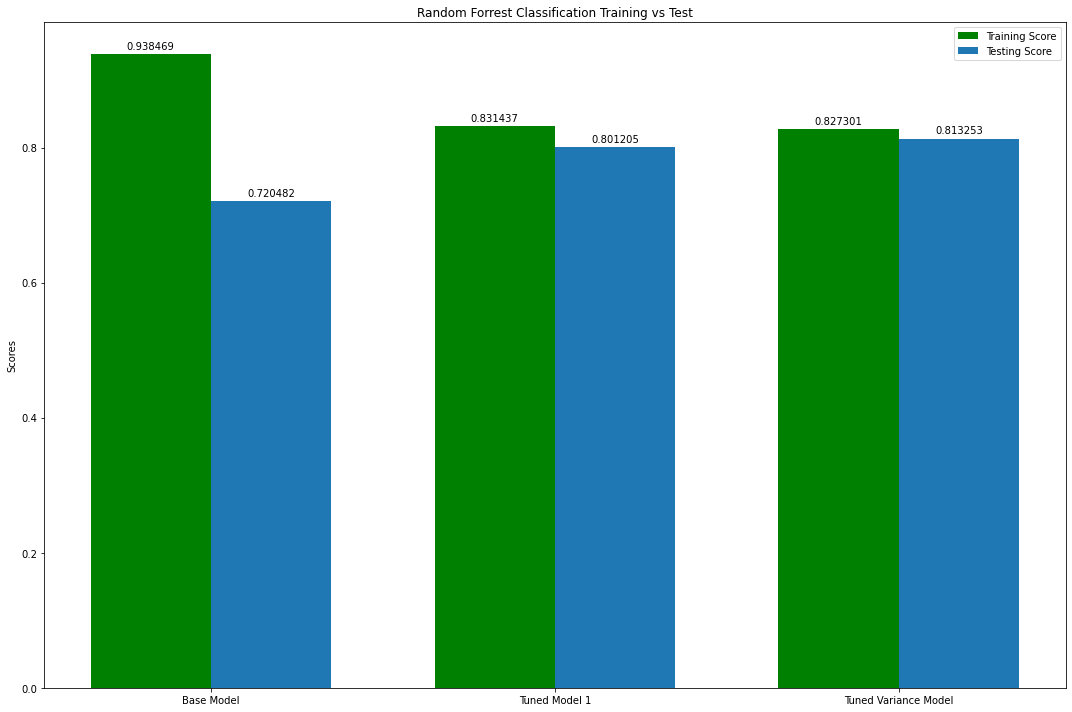

In [82]:
labels = ['Base Model', 'Tuned Model 1', 'Tuned Variance Model']
training_scores = [RFC_base_model_train_score,RFC_tuned_model_1_train_score,RFC_tuned_model_2_train_score]
test_scores = [RFC_base_model_test_score,RFC_tuned_model_1_test_score,RFC_tuned_model_2_test_score]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Score', color='green')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Score')

ax.set_ylabel('Scores')
ax.set_title("Random Forrest Classification Training vs Test")
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

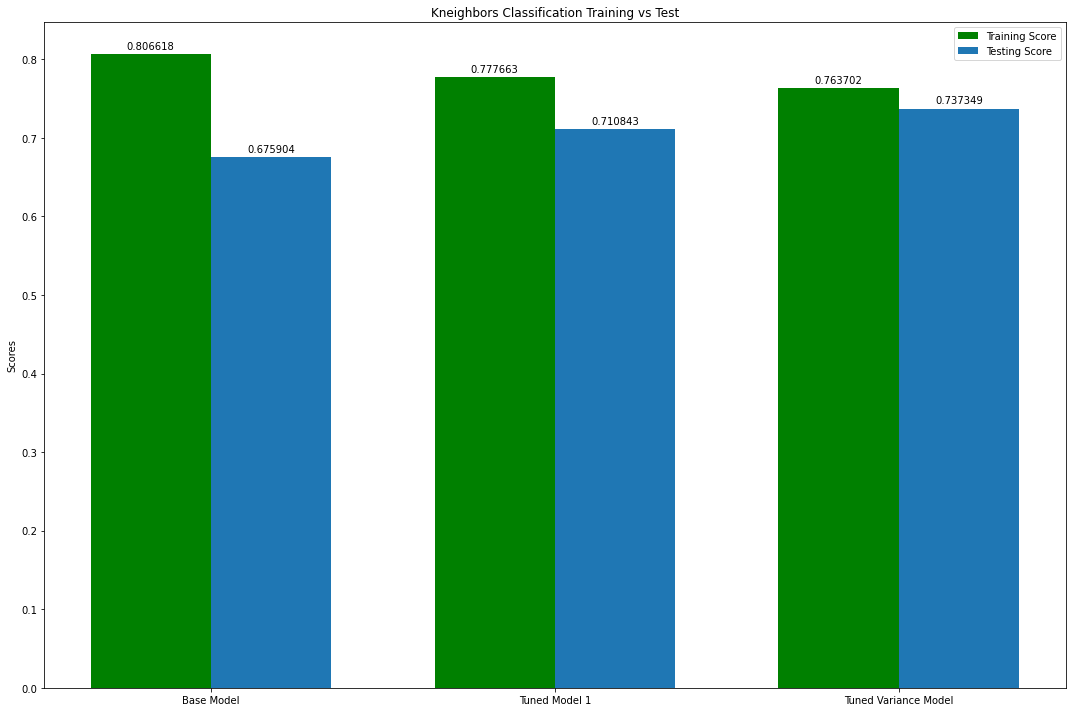

In [83]:
labels = ['Base Model', 'Tuned Model 1', 'Tuned Variance Model']
training_scores = [KNC_base_model_train_score,KNC_tuned_model_1_train_score,KNC_tuned_model_2_train_score,]
test_scores =     [KNC_base_model_test_score,KNC_tuned_model_1_test_score,KNC_tuned_model_2_test_score]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Score', color='green')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Score')

ax.set_ylabel('Scores')
ax.set_title("Kneighbors Classification Training vs Test")
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

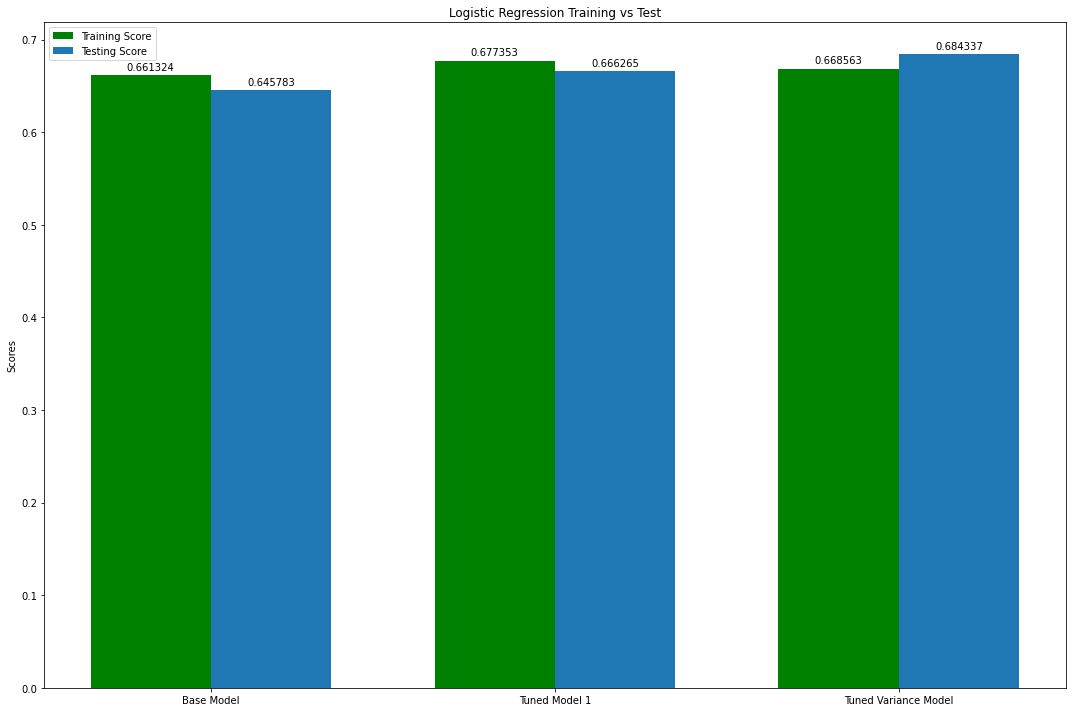

In [84]:
labels = ['Base Model', 'Tuned Model 1', 'Tuned Variance Model']
training_scores = [LR_base_model_train_score,LR_tuned_model_1_train_score,LR_tuned_model_2_train_score]
test_scores =     [LR_base_model_test_score,LR_tuned_model_1_test_score,LR_tuned_model_2_test_score]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training Score', color='green')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Score')

ax.set_ylabel('Scores')
ax.set_title("Logistic Regression Training vs Test")
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.rcParams["figure.figsize"] = (15, 12)
fig.tight_layout()
plt.show()

In [88]:
print("Classification report for tuned model 1 (Random Forest)")
print(RFC_2_cr)

Classification report for tuned model 1 (Random Forest)
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       503
           1       0.94      0.53      0.68       327

    accuracy                           0.80       830
   macro avg       0.85      0.75      0.77       830
weighted avg       0.83      0.80      0.79       830



In [89]:
print("Classification report for the tuned variance model (Random Forest)")
print(RFC_3_cr)

Classification report for the tuned variance model (Random Forest)
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       502
           1       0.88      0.61      0.72       328

    accuracy                           0.81       830
   macro avg       0.83      0.78      0.79       830
weighted avg       0.82      0.81      0.81       830



In [90]:
print("Classification report for tuned model 1 (Kneighhors)")
print(KNC_2_cr)

Classification report for tuned model 1 (Kneighhors)
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       503
           1       0.71      0.45      0.55       327

    accuracy                           0.71       830
   macro avg       0.71      0.67      0.67       830
weighted avg       0.71      0.71      0.69       830



In [91]:
print("Classification report for the tuned variance model (Kneighhors)")
print(KNC_3_cr)

Classification report for the tuned variance model (Kneighhors)
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       502
           1       0.82      0.43      0.57       328

    accuracy                           0.74       830
   macro avg       0.77      0.68      0.69       830
weighted avg       0.76      0.74      0.71       830



In [92]:
print("Classification report for tuned model 1(LogisticRegression)")
print(LR_2_cr)

Classification report for tuned model 1(LogisticRegression)
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       503
           1       0.64      0.34      0.45       327

    accuracy                           0.67       830
   macro avg       0.66      0.61      0.60       830
weighted avg       0.66      0.67      0.64       830



In [93]:
print("Classification report for tuned variance model (LogisticRegression)")
print(LR_3_cr)

Classification report for tuned variance model (LogisticRegression)
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       502
           1       0.68      0.38      0.49       328

    accuracy                           0.68       830
   macro avg       0.68      0.63      0.63       830
weighted avg       0.68      0.68      0.66       830

